In [151]:
import jsonlines
from collections import defaultdict
import openai
import json
import regex
from typing import Dict, Any, Tuple
from tqdm import tqdm 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [152]:
train_data = defaultdict(list)
test_data = defaultdict(list)

for year in [1998, 2001, 2004, 2007, 2010, 2013, 2016]:
    with jsonlines.open(f'year_test/year_{year}.jsonl') as f:
        for line in f.iter():
            train_data[year].append(line)


for year in range(1998, 2023):
    with jsonlines.open(f'year_test/year_test_{year}.jsonl') as f:
        for line in f.iter():
            test_data[year].append(line)

In [3]:
openai.api_key = 'your_api_key'

In [4]:
# Have to modify to your fine-tuned models!

ft_model = {
    1998: 'ft:gpt-4o-2024-08-06:personal:year-1998:AdGh1Inl',
    2001: 'ft:gpt-4o-2024-08-06:personal:year-2001:AdHbsodp',
    2004: 'ft:gpt-4o-2024-08-06:personal:year-2004:AdMLbkJa',
    2007: 'ft:gpt-4o-2024-08-06:personal:year-2007:AdI6ZBwG',
    2010: 'ft:gpt-4o-2024-08-06:personal:year-2010:AdMHGRYF',
    2013: 'ft:gpt-4o-2024-08-06:personal:year-2013:AdM8yQus',
    2016: 'ft:gpt-4o-2024-08-06:personal:year-2016:AdIC2TYu',
}

In [5]:
time_dict = {
    'days': 24,
    'day': 24,
    'weeks': 24*7,
    'week': 24*7,
    'hours': 1,
    'hour': 1,
    'h': 1,
    'minute': 1/60,
    'min': 1/60,
    's': 1/3600
}

In [6]:
def get_answers(model: str, message: dict, temperature=0.0) -> tuple:
    completion = openai.ChatCompletion.create(
        model=model,
        messages=message['messages'][:2],
        temperature=temperature
    )

    prediction = json.loads(completion.choices[0].message['content'])
    true = json.loads(message['messages'][2]['content'])

    return true, prediction

In [ ]:
# After 2017
true_label, prediction_label = defaultdict(list), defaultdict(list)

for i in [1998, 2001, 2004, 2007, 2010, 2013, 2016]:
    model = ft_model[i]

    for j in [2017, 2018, 2019, 2020, 2021, 2022]:
        testset = test_data[j]

        print (f'start: {i}-{j}')

        for k, message in tqdm(enumerate(testset), total=len(testset)):
            try:
                true, prediction = get_answers(model, message)
            except Exception as e:
                print (f'gpt3.5-{i}-{k} : ', e)
                continue
            else:
                true_label[f'year{i}-{j}'].append(true)
                prediction_label[f'year{i}-{j}'].append(prediction)

start: 1998-2017


  6%|▌         | 24/429 [01:24<19:07,  2.83s/it]  

gpt3.5-1998-23 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 03:30:55 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '2266', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999874', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_fbd8bba69e6718c8f64f

  9%|▉         | 38/429 [02:58<28:35,  4.39s/it]  

gpt3.5-1998-37 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 03:32:30 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '6928', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999879', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_181ff6dd0202c8234f9b

 10%|█         | 43/429 [03:37<58:56,  9.16s/it]

gpt3.5-1998-42 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 03:33:09 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '19597', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999879', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_c07e7541cf92c75bde8

 14%|█▍        | 60/429 [04:39<51:57,  8.45s/it]

gpt3.5-1998-59 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 03:34:10 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '22386', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999885', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_248201472f9293c6c9b

 18%|█▊        | 77/429 [05:31<16:20,  2.79s/it]

gpt3.5-1998-76 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 03:35:02 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '3004', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999877', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_50390ad4816b5e3794f3

 77%|███████▋  | 330/429 [16:54<04:11,  2.54s/it]

gpt3.5-1998-329 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 03:46:25 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '1439', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999882', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_c336397195550d42ae6

 86%|████████▌ | 370/429 [18:37<03:51,  3.92s/it]

gpt3.5-1998-369 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 03:48:08 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '6943', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999880', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_5e9544c781903edc63e

 86%|████████▋ | 371/429 [18:39<03:06,  3.21s/it]

gpt3.5-1998-370 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 03:48:10 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '1161', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999880', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_d2be6d4da2604452911

 92%|█████████▏| 393/429 [19:50<02:00,  3.35s/it]

gpt3.5-1998-392 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 03:49:21 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '591', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999870', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_f927240f975112ab5522

100%|██████████| 429/429 [21:31<00:00,  3.01s/it]


start: 1998-2018


 31%|███       | 108/347 [05:07<12:59,  3.26s/it]

gpt3.5-1998-107 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 03:56:09 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '738', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999877', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_3f588c8717e342bea342

 53%|█████▎    | 184/347 [07:51<05:34,  2.05s/it]

gpt3.5-1998-183 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 03:58:53 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '1427', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999871', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_d32fd9ad683bdf4617c

 56%|█████▌    | 193/347 [08:13<04:46,  1.86s/it]

gpt3.5-1998-192 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 03:59:15 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '696', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999879', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_76d37161fa9032aeb076

 59%|█████▉    | 206/347 [08:45<04:54,  2.09s/it]

gpt3.5-1998-205 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 03:59:47 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '1408', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999879', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_45db4974c5a41c5c6c2

 61%|██████    | 212/347 [08:55<04:03,  1.81s/it]

gpt3.5-1998-211 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 03:59:58 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '1337', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999876', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_6242c490132bd70183f

 75%|███████▍  | 259/347 [12:18<42:35, 29.04s/it]

gpt3.5-1998-258 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 04:03:20 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '90704', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999876', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_5f0d0051263d2dcecf

100%|██████████| 347/347 [16:23<00:00,  2.83s/it]


start: 1998-2019


100%|██████████| 254/254 [11:44<00:00,  2.77s/it]


start: 1998-2020


100%|██████████| 18/18 [00:41<00:00,  2.30s/it]


start: 1998-2021


100%|██████████| 20/20 [00:42<00:00,  2.15s/it]


start: 1998-2022


100%|██████████| 8/8 [00:17<00:00,  2.14s/it]


start: 2001-2017


100%|██████████| 429/429 [21:29<00:00,  3.00s/it] 


start: 2001-2018


100%|██████████| 347/347 [15:41<00:00,  2.71s/it]


start: 2001-2019


100%|██████████| 254/254 [10:54<00:00,  2.58s/it]


start: 2001-2020


100%|██████████| 18/18 [03:50<00:00, 12.83s/it]


start: 2001-2021


100%|██████████| 20/20 [00:46<00:00,  2.32s/it]


start: 2001-2022


100%|██████████| 8/8 [00:25<00:00,  3.24s/it]


start: 2004-2017


 24%|██▎       | 101/429 [12:06<09:55,  1.82s/it] 

gpt3.5-2004-100 :  Expecting value: line 1 column 1 (char 0)


 28%|██▊       | 121/429 [12:48<08:59,  1.75s/it]

gpt3.5-2004-120 :  Expecting value: line 1 column 1 (char 0)


 28%|██▊       | 122/429 [12:48<07:16,  1.42s/it]

gpt3.5-2004-121 :  Expecting value: line 1 column 1 (char 0)


 51%|█████     | 219/429 [18:56<07:15,  2.07s/it]  

gpt3.5-2004-218 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 429/429 [27:01<00:00,  3.78s/it]


start: 2004-2018


 71%|███████   | 247/347 [09:49<02:47,  1.67s/it]

gpt3.5-2004-246 :  Expecting value: line 1 column 1 (char 0)


 71%|███████▏  | 248/347 [09:49<02:23,  1.45s/it]

gpt3.5-2004-247 :  Expecting value: line 1 column 1 (char 0)


 72%|███████▏  | 249/347 [09:51<02:11,  1.34s/it]

gpt3.5-2004-248 :  Expecting value: line 1 column 1 (char 0)


 72%|███████▏  | 250/347 [09:52<02:25,  1.50s/it]

gpt3.5-2004-249 :  Expecting value: line 1 column 1 (char 0)


 95%|█████████▌| 330/347 [12:46<00:42,  2.50s/it]

gpt3.5-2004-329 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 347/347 [13:22<00:00,  2.31s/it]


start: 2004-2019


100%|██████████| 254/254 [10:21<00:00,  2.45s/it]


start: 2004-2020


 17%|█▋        | 3/18 [00:04<00:21,  1.44s/it]

gpt3.5-2004-2 :  The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID req_ee11d6e93fbc8f034b768352927f1c3c in your email.) {
  "error": {
    "message": "The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID req_ee11d6e93fbc8f034b768352927f1c3c in your email.)",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID req_ee11d6e93fbc8f034b768352927f1c3c in your email.)', 'type': 'server_error', 'param': None, 'code': Non

 61%|██████    | 11/18 [01:51<02:46, 23.82s/it]

gpt3.5-2004-10 :  The server is overloaded or not ready yet.


100%|██████████| 18/18 [02:06<00:00,  7.02s/it]


start: 2004-2021


100%|██████████| 20/20 [00:46<00:00,  2.33s/it]


start: 2004-2022


100%|██████████| 8/8 [00:34<00:00,  4.36s/it]


start: 2007-2017


 22%|██▏       | 93/429 [07:57<11:05,  1.98s/it]  

gpt3.5-2007-92 :  Expecting value: line 1 column 1 (char 0)


 22%|██▏       | 94/429 [07:59<09:54,  1.78s/it]

gpt3.5-2007-93 :  Expecting value: line 1 column 1 (char 0)


 24%|██▎       | 101/429 [08:15<10:05,  1.85s/it]

gpt3.5-2007-100 :  Expecting value: line 1 column 1 (char 0)


 28%|██▊       | 121/429 [09:12<10:11,  1.98s/it]

gpt3.5-2007-120 :  Expecting value: line 1 column 1 (char 0)


 28%|██▊       | 122/429 [09:12<08:29,  1.66s/it]

gpt3.5-2007-121 :  Expecting value: line 1 column 1 (char 0)


 36%|███▋      | 156/429 [10:29<11:28,  2.52s/it]

gpt3.5-2007-155 :  Expecting value: line 1 column 1 (char 0)


 37%|███▋      | 158/429 [10:33<09:10,  2.03s/it]

gpt3.5-2007-157 :  Expecting value: line 1 column 1 (char 0)


 38%|███▊      | 164/429 [10:49<12:03,  2.73s/it]

gpt3.5-2007-163 :  Expecting value: line 1 column 1 (char 0)


 51%|█████     | 219/429 [13:22<06:15,  1.79s/it]

gpt3.5-2007-218 :  Expecting value: line 1 column 1 (char 0)


 69%|██████▉   | 297/429 [16:49<03:52,  1.76s/it]

gpt3.5-2007-296 :  Expecting value: line 1 column 1 (char 0)


 77%|███████▋  | 331/429 [18:13<03:23,  2.08s/it]

gpt3.5-2007-330 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 429/429 [22:18<00:00,  3.12s/it]


start: 2007-2018


 28%|██▊       | 97/347 [03:44<07:48,  1.87s/it]

gpt3.5-2007-96 :  Expecting value: line 1 column 1 (char 0)


 28%|██▊       | 98/347 [03:45<06:45,  1.63s/it]

gpt3.5-2007-97 :  Expecting value: line 1 column 1 (char 0)


 71%|███████   | 247/347 [10:08<03:26,  2.07s/it]

gpt3.5-2007-246 :  Expecting value: line 1 column 1 (char 0)


 71%|███████▏  | 248/347 [10:09<02:41,  1.63s/it]

gpt3.5-2007-247 :  Expecting value: line 1 column 1 (char 0)


 72%|███████▏  | 249/347 [10:18<06:30,  3.98s/it]

gpt3.5-2007-248 :  Expecting value: line 1 column 1 (char 0)


 72%|███████▏  | 250/347 [10:19<04:50,  3.00s/it]

gpt3.5-2007-249 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 347/347 [14:26<00:00,  2.50s/it]


start: 2007-2019


 72%|███████▏  | 183/254 [07:55<02:50,  2.40s/it]

gpt3.5-2007-182 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 254/254 [10:56<00:00,  2.59s/it]


start: 2007-2020


100%|██████████| 18/18 [00:43<00:00,  2.40s/it]


start: 2007-2021


100%|██████████| 20/20 [00:44<00:00,  2.24s/it]


start: 2007-2022


100%|██████████| 8/8 [00:21<00:00,  2.67s/it]


start: 2010-2017


 22%|██▏       | 93/429 [19:11<13:39,  2.44s/it]   

gpt3.5-2010-92 :  Expecting value: line 1 column 1 (char 0)


 22%|██▏       | 95/429 [19:15<12:30,  2.25s/it]

gpt3.5-2010-94 :  Expecting value: line 1 column 1 (char 0)


 24%|██▎       | 101/429 [19:27<09:35,  1.75s/it]

gpt3.5-2010-100 :  Expecting value: line 1 column 1 (char 0)


 28%|██▊       | 121/429 [20:14<09:07,  1.78s/it]

gpt3.5-2010-120 :  Expecting value: line 1 column 1 (char 0)


 28%|██▊       | 122/429 [20:15<08:26,  1.65s/it]

gpt3.5-2010-121 :  Expecting value: line 1 column 1 (char 0)


 36%|███▋      | 156/429 [21:31<09:17,  2.04s/it]

gpt3.5-2010-155 :  Expecting value: line 1 column 1 (char 0)


 37%|███▋      | 158/429 [21:36<09:17,  2.06s/it]

gpt3.5-2010-157 :  Expecting value: line 1 column 1 (char 0)


 45%|████▍     | 193/429 [23:00<07:22,  1.88s/it]

gpt3.5-2010-192 :  Expecting value: line 1 column 1 (char 0)


 51%|█████     | 219/429 [24:07<06:33,  1.88s/it]

gpt3.5-2010-218 :  Expecting value: line 1 column 1 (char 0)


 59%|█████▊    | 251/429 [25:25<05:38,  1.90s/it]

gpt3.5-2010-250 :  Expecting value: line 1 column 1 (char 0)


 59%|█████▉    | 253/429 [25:28<05:03,  1.73s/it]

gpt3.5-2010-252 :  Expecting value: line 1 column 1 (char 0)


 59%|█████▉    | 254/429 [25:30<05:17,  1.81s/it]

gpt3.5-2010-253 :  Expecting value: line 1 column 1 (char 0)


 62%|██████▏   | 264/429 [25:51<05:21,  1.95s/it]

gpt3.5-2010-263 :  Expecting value: line 1 column 1 (char 0)


 69%|██████▉   | 298/429 [27:11<04:13,  1.94s/it]

gpt3.5-2010-297 :  Expecting value: line 1 column 1 (char 0)


 77%|███████▋  | 332/429 [28:37<03:12,  1.99s/it]

gpt3.5-2010-331 :  Expecting value: line 1 column 1 (char 0)


 79%|███████▉  | 339/429 [28:52<02:56,  1.96s/it]

gpt3.5-2010-338 :  Expecting value: line 1 column 1 (char 0)


 79%|███████▉  | 340/429 [28:53<02:29,  1.68s/it]

gpt3.5-2010-339 :  Expecting value: line 1 column 1 (char 0)


 82%|████████▏ | 351/429 [29:18<02:40,  2.06s/it]

gpt3.5-2010-350 :  Expecting value: line 1 column 1 (char 0)


 84%|████████▍ | 361/429 [29:39<02:06,  1.86s/it]

gpt3.5-2010-360 :  Expecting value: line 1 column 1 (char 0)


 84%|████████▍ | 362/429 [29:41<02:03,  1.84s/it]

gpt3.5-2010-361 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 429/429 [32:26<00:00,  4.54s/it]


start: 2010-2018


 28%|██▊       | 97/347 [03:41<08:28,  2.03s/it]

gpt3.5-2010-96 :  Expecting value: line 1 column 1 (char 0)


 29%|██▊       | 99/347 [03:44<06:51,  1.66s/it]

gpt3.5-2010-98 :  Expecting value: line 1 column 1 (char 0)


 35%|███▌      | 123/347 [04:42<08:49,  2.36s/it]

gpt3.5-2010-122 :  Expecting value: line 1 column 1 (char 0)


 56%|█████▋    | 196/347 [07:37<07:55,  3.15s/it]

gpt3.5-2010-195 :  Expecting value: line 1 column 1 (char 0)


 71%|███████   | 247/347 [09:39<02:53,  1.74s/it]

gpt3.5-2010-246 :  Expecting value: line 1 column 1 (char 0)


 71%|███████▏  | 248/347 [09:40<02:29,  1.51s/it]

gpt3.5-2010-247 :  Expecting value: line 1 column 1 (char 0)


 82%|████████▏ | 284/347 [11:15<02:07,  2.02s/it]

gpt3.5-2010-283 :  Expecting value: line 1 column 1 (char 0)


 95%|█████████▌| 330/347 [13:27<00:33,  1.95s/it]

gpt3.5-2010-329 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 347/347 [14:13<00:00,  2.46s/it]


start: 2010-2019


 37%|███▋      | 93/254 [03:49<05:48,  2.17s/it]

gpt3.5-2010-92 :  Expecting value: line 1 column 1 (char 0)


 58%|█████▊    | 147/254 [05:53<03:10,  1.78s/it]

gpt3.5-2010-146 :  Expecting value: line 1 column 1 (char 0)


 72%|███████▏  | 183/254 [07:19<02:37,  2.22s/it]

gpt3.5-2010-182 :  Expecting value: line 1 column 1 (char 0)


 77%|███████▋  | 195/254 [08:00<02:13,  2.26s/it]

gpt3.5-2010-194 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 254/254 [10:12<00:00,  2.41s/it]


start: 2010-2020


100%|██████████| 18/18 [00:39<00:00,  2.20s/it]


start: 2010-2021


 30%|███       | 6/20 [00:12<00:28,  2.06s/it]

gpt3.5-2010-5 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 20/20 [00:47<00:00,  2.39s/it]


start: 2010-2022


100%|██████████| 8/8 [00:19<00:00,  2.44s/it]


start: 2013-2017


 84%|████████▍ | 360/429 [16:01<02:10,  1.89s/it]

gpt3.5-2013-359 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 429/429 [19:25<00:00,  2.72s/it]


start: 2013-2018


 29%|██▊       | 99/347 [04:45<56:07, 13.58s/it]  

gpt3.5-2013-98 :  Expecting value: line 1 column 1 (char 0)


 52%|█████▏    | 179/347 [09:42<1:22:04, 29.31s/it]

gpt3.5-2013-178 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 08:25:32 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '90738', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999879', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_73e23ce0dad78b88cf

100%|██████████| 347/347 [17:33<00:00,  3.04s/it]  


start: 2013-2019


 72%|███████▏  | 183/254 [07:39<02:50,  2.41s/it]

gpt3.5-2013-182 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 254/254 [10:45<00:00,  2.54s/it]


start: 2013-2020


100%|██████████| 18/18 [00:44<00:00,  2.48s/it]


start: 2013-2021


100%|██████████| 20/20 [01:00<00:00,  3.00s/it]


start: 2013-2022


100%|██████████| 8/8 [00:19<00:00,  2.39s/it]


start: 2016-2017


 36%|███▌      | 155/429 [09:46<2:16:12, 29.83s/it]

gpt3.5-2016-154 :  The server had an error while processing your request. Sorry about that! {
  "error": {
    "message": "The server had an error while processing your request. Sorry about that!",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error while processing your request. Sorry about that!', 'type': 'server_error', 'param': None, 'code': None}} {'Date': 'Thu, 12 Dec 2024 08:56:00 GMT', 'Content-Type': 'application/json', 'Content-Length': '175', 'Connection': 'keep-alive', 'access-control-expose-headers': 'X-Request-ID', 'openai-organization': 'user-bh02lranbcmbofrotobh9bep', 'openai-processing-ms': '93585', 'openai-version': '2020-10-01', 'x-ratelimit-limit-requests': '10000', 'x-ratelimit-limit-tokens': '30000000', 'x-ratelimit-remaining-requests': '9999', 'x-ratelimit-remaining-tokens': '29999869', 'x-ratelimit-reset-requests': '6ms', 'x-ratelimit-reset-tokens': '0s', 'x-request-id': 'req_61b23335389937adc9

100%|██████████| 429/429 [25:19<00:00,  3.54s/it]  


start: 2016-2018


 80%|████████  | 279/347 [12:14<02:27,  2.17s/it]

gpt3.5-2016-278 :  Expecting value: line 1 column 43 (char 42)


100%|██████████| 347/347 [15:25<00:00,  2.67s/it]


start: 2016-2019


 75%|███████▌  | 191/254 [08:07<02:27,  2.34s/it]

gpt3.5-2016-190 :  Expecting value: line 1 column 62 (char 61)


100%|██████████| 254/254 [10:41<00:00,  2.52s/it]


start: 2016-2020


100%|██████████| 18/18 [00:45<00:00,  2.50s/it]


start: 2016-2021


100%|██████████| 20/20 [00:48<00:00,  2.45s/it]


start: 2016-2022


100%|██████████| 8/8 [00:17<00:00,  2.14s/it]


In [155]:
# After 5 years

for i in [1998, 2001, 2004, 2007, 2010, 2013, 2016]:
    model = ft_model[i]

    for j in range(i+1, i+6):
        testset = test_data[j]
        if true_label[f'year{i}-{j}']:
            continue

        print (f'start: {i}-{j}')

        for k, message in tqdm(enumerate(testset), total=len(testset)):
            try:
                true, prediction = get_answers(model, message)
            except Exception as e:
                print (f'gpt3.5-{i}-{k} : ', e)
                continue
            else:
                true_label[f'year{i}-{j}'].append(true)
                prediction_label[f'year{i}-{j}'].append(prediction)

start: 1998-1999


100%|██████████| 46/46 [02:53<00:00,  3.77s/it]


start: 1998-2000


100%|██████████| 31/31 [01:15<00:00,  2.43s/it]


start: 1998-2001


100%|██████████| 73/73 [03:22<00:00,  2.78s/it]


start: 1998-2002


100%|██████████| 85/85 [03:56<00:00,  2.78s/it]


start: 1998-2003


100%|██████████| 160/160 [06:53<00:00,  2.58s/it]


start: 2001-2002


100%|██████████| 85/85 [04:35<00:00,  3.25s/it]


start: 2001-2003


100%|██████████| 160/160 [06:49<00:00,  2.56s/it]


start: 2001-2004


100%|██████████| 160/160 [06:55<00:00,  2.59s/it]


start: 2001-2005


100%|██████████| 222/222 [09:32<00:00,  2.58s/it]


start: 2001-2006


100%|██████████| 383/383 [17:36<00:00,  2.76s/it]


start: 2004-2005


 70%|██████▉   | 155/222 [07:18<02:19,  2.08s/it]

gpt3.5-2004-154 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 222/222 [10:15<00:00,  2.77s/it]


start: 2004-2006


 72%|███████▏  | 275/383 [13:33<03:17,  1.83s/it] 

gpt3.5-2004-274 :  Expecting value: line 1 column 1 (char 0)


 72%|███████▏  | 276/383 [13:34<02:50,  1.59s/it]

gpt3.5-2004-275 :  Expecting value: line 1 column 1 (char 0)


 85%|████████▌ | 326/383 [15:40<01:39,  1.74s/it]

gpt3.5-2004-325 :  The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID req_d26c8895f23cb1eebffbb53953cb2c7f in your email.) {
  "error": {
    "message": "The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID req_d26c8895f23cb1eebffbb53953cb2c7f in your email.)",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID req_d26c8895f23cb1eebffbb53953cb2c7f in your email.)', 'type': 'server_error', 'param': None, 'code': N

100%|██████████| 383/383 [19:00<00:00,  2.98s/it]


start: 2004-2007


100%|██████████| 374/374 [17:18<00:00,  2.78s/it]


start: 2004-2008


 14%|█▍        | 82/590 [03:50<24:39,  2.91s/it]  

gpt3.5-2004-81 :  Expecting value: line 1 column 1 (char 0)


 14%|█▍        | 83/590 [03:52<20:23,  2.41s/it]

gpt3.5-2004-82 :  Expecting value: line 1 column 1 (char 0)


 37%|███▋      | 221/590 [10:02<13:13,  2.15s/it]

gpt3.5-2004-220 :  Expecting value: line 1 column 1 (char 0)


 68%|██████▊   | 400/590 [17:56<07:37,  2.41s/it]

gpt3.5-2004-399 :  Expecting value: line 1 column 1 (char 0)


 68%|██████▊   | 401/590 [18:03<12:35,  4.00s/it]

gpt3.5-2004-400 :  Expecting value: line 1 column 1 (char 0)


 68%|██████▊   | 402/590 [18:06<11:04,  3.54s/it]

gpt3.5-2004-401 :  Expecting value: line 1 column 1 (char 0)


 81%|████████  | 476/590 [21:25<04:38,  2.45s/it]

gpt3.5-2004-475 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 590/590 [26:40<00:00,  2.71s/it]


gpt3.5-2004-589 :  Expecting value: line 1 column 1 (char 0)
start: 2004-2009


 17%|█▋        | 128/766 [06:25<29:08,  2.74s/it] 

gpt3.5-2004-127 :  Expecting value: line 1 column 1 (char 0)


 20%|██        | 157/766 [08:01<33:26,  3.30s/it]  

gpt3.5-2004-156 :  Expecting value: line 1 column 1 (char 0)


 21%|██        | 158/766 [08:01<25:34,  2.52s/it]

gpt3.5-2004-157 :  Expecting value: line 1 column 1 (char 0)


 21%|██        | 159/766 [08:03<21:44,  2.15s/it]

gpt3.5-2004-158 :  Expecting value: line 1 column 1 (char 0)


 21%|██        | 160/766 [08:04<18:16,  1.81s/it]

gpt3.5-2004-159 :  Expecting value: line 1 column 1 (char 0)


 38%|███▊      | 291/766 [13:51<15:23,  1.94s/it]

gpt3.5-2004-290 :  Expecting value: line 1 column 1 (char 0)


 61%|██████▏   | 470/766 [23:34<08:12,  1.67s/it]  

gpt3.5-2004-469 :  Expecting value: line 1 column 1 (char 0)


 80%|████████  | 614/766 [30:30<05:42,  2.26s/it]  

gpt3.5-2004-613 :  Expecting value: line 1 column 1 (char 0)


 81%|████████  | 619/766 [30:40<04:18,  1.76s/it]

gpt3.5-2004-618 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 766/766 [37:28<00:00,  2.94s/it]


start: 2007-2008


 14%|█▍        | 82/590 [04:01<14:32,  1.72s/it]  

gpt3.5-2007-81 :  Expecting value: line 1 column 1 (char 0)


 14%|█▍        | 83/590 [04:01<11:51,  1.40s/it]

gpt3.5-2007-82 :  Expecting value: line 1 column 1 (char 0)


 37%|███▋      | 221/590 [11:17<19:40,  3.20s/it]  

gpt3.5-2007-220 :  Expecting value: line 1 column 1 (char 0)


 48%|████▊     | 286/590 [13:59<09:14,  1.82s/it]

gpt3.5-2007-285 :  Expecting value: line 1 column 1 (char 0)


 68%|██████▊   | 400/590 [19:52<05:30,  1.74s/it]  

gpt3.5-2007-399 :  Expecting value: line 1 column 1 (char 0)


 68%|██████▊   | 401/590 [19:53<05:06,  1.62s/it]

gpt3.5-2007-400 :  Expecting value: line 1 column 1 (char 0)


 68%|██████▊   | 402/590 [19:54<04:12,  1.34s/it]

gpt3.5-2007-401 :  Expecting value: line 1 column 1 (char 0)


 81%|████████  | 476/590 [23:32<03:30,  1.85s/it]

gpt3.5-2007-475 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 590/590 [28:35<00:00,  2.91s/it]


gpt3.5-2007-589 :  Expecting value: line 1 column 1 (char 0)
start: 2007-2009


 20%|██        | 154/766 [06:27<20:42,  2.03s/it] 

gpt3.5-2007-153 :  Expecting value: line 1 column 1 (char 0)


 20%|██        | 157/766 [06:33<18:11,  1.79s/it]

gpt3.5-2007-156 :  Expecting value: line 1 column 1 (char 0)


 21%|██        | 158/766 [06:33<14:44,  1.45s/it]

gpt3.5-2007-157 :  Expecting value: line 1 column 1 (char 0)


 21%|██        | 159/766 [06:35<16:35,  1.64s/it]

gpt3.5-2007-158 :  Expecting value: line 1 column 1 (char 0)


 21%|██        | 160/766 [06:36<14:17,  1.42s/it]

gpt3.5-2007-159 :  Expecting value: line 1 column 1 (char 0)


 38%|███▊      | 291/766 [12:37<13:29,  1.70s/it]  

gpt3.5-2007-290 :  Expecting value: line 1 column 1 (char 0)


 61%|██████▏   | 470/766 [20:05<09:19,  1.89s/it]

gpt3.5-2007-469 :  Expecting value: line 1 column 1 (char 0)


 78%|███████▊  | 601/766 [26:27<05:03,  1.84s/it]  

gpt3.5-2007-600 :  Expecting value: line 1 column 1 (char 0)


 80%|████████  | 614/766 [27:19<05:10,  2.05s/it]

gpt3.5-2007-613 :  Expecting value: line 1 column 1 (char 0)


 81%|████████  | 619/766 [27:30<04:43,  1.93s/it]

gpt3.5-2007-618 :  Expecting value: line 1 column 1 (char 0)


 90%|█████████ | 691/766 [30:31<02:22,  1.90s/it]

gpt3.5-2007-690 :  Expecting value: line 1 column 1 (char 0)


 90%|█████████ | 692/766 [30:33<02:30,  2.04s/it]

gpt3.5-2007-691 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 766/766 [33:55<00:00,  2.66s/it]


start: 2007-2010


 62%|██████▏   | 389/632 [17:37<11:34,  2.86s/it]

gpt3.5-2007-388 :  Expecting value: line 1 column 1 (char 0)


 64%|██████▍   | 405/632 [18:24<07:56,  2.10s/it]

gpt3.5-2007-404 :  Expecting value: line 1 column 1 (char 0)


 80%|███████▉  | 503/632 [22:44<06:24,  2.98s/it]

gpt3.5-2007-502 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 632/632 [28:13<00:00,  2.68s/it]


start: 2007-2011


 31%|███▏      | 266/847 [11:59<18:30,  1.91s/it]  

gpt3.5-2007-265 :  Expecting value: line 1 column 1 (char 0)


 32%|███▏      | 267/847 [12:00<16:41,  1.73s/it]

gpt3.5-2007-266 :  Expecting value: line 1 column 1 (char 0)


 32%|███▏      | 268/847 [12:01<14:32,  1.51s/it]

gpt3.5-2007-267 :  Expecting value: line 1 column 1 (char 0)


 37%|███▋      | 310/847 [13:45<17:20,  1.94s/it]

gpt3.5-2007-309 :  Expecting value: line 1 column 1 (char 0)


 45%|████▍     | 380/847 [17:27<37:35,  4.83s/it]

gpt3.5-2007-379 :  Expecting value: line 1 column 1 (char 0)


 45%|████▍     | 381/847 [17:28<28:42,  3.70s/it]

gpt3.5-2007-380 :  Expecting value: line 1 column 1 (char 0)


 45%|████▌     | 382/847 [17:29<21:49,  2.82s/it]

gpt3.5-2007-381 :  Expecting value: line 1 column 1 (char 0)


 45%|████▌     | 383/847 [17:29<16:56,  2.19s/it]

gpt3.5-2007-382 :  Expecting value: line 1 column 1 (char 0)


 50%|████▉     | 422/847 [19:24<14:20,  2.02s/it]

gpt3.5-2007-421 :  Expecting value: line 1 column 1 (char 0)


 50%|████▉     | 423/847 [19:25<11:20,  1.60s/it]

gpt3.5-2007-422 :  Expecting value: line 1 column 1 (char 0)


 50%|█████     | 424/847 [19:26<09:26,  1.34s/it]

gpt3.5-2007-423 :  Expecting value: line 1 column 1 (char 0)


 50%|█████     | 425/847 [19:27<09:27,  1.34s/it]

gpt3.5-2007-424 :  Expecting value: line 1 column 1 (char 0)


 76%|███████▋  | 647/847 [28:21<06:06,  1.83s/it]

gpt3.5-2007-646 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 847/847 [37:02<00:00,  2.62s/it]


start: 2007-2012


  1%|          | 5/812 [02:10<8:04:30, 36.02s/it]

gpt3.5-2007-4 :  The server is overloaded or not ready yet.


  1%|          | 10/812 [03:01<4:18:15, 19.32s/it]

gpt3.5-2007-9 :  The server is overloaded or not ready yet.


  5%|▌         | 42/812 [04:14<23:30,  1.83s/it]  

gpt3.5-2007-41 :  Expecting value: line 1 column 1 (char 0)


 14%|█▍        | 112/812 [06:54<17:38,  1.51s/it]

gpt3.5-2007-111 :  Expecting value: line 1 column 1 (char 0)


 35%|███▍      | 284/812 [13:58<17:30,  1.99s/it]

gpt3.5-2007-283 :  Expecting value: line 1 column 1 (char 0)


 38%|███▊      | 308/812 [14:52<14:23,  1.71s/it]

gpt3.5-2007-307 :  Expecting value: line 1 column 1 (char 0)


 53%|█████▎    | 433/812 [20:33<11:42,  1.85s/it]  

gpt3.5-2007-432 :  Expecting value: line 1 column 1 (char 0)


 58%|█████▊    | 467/812 [21:53<09:58,  1.74s/it]

gpt3.5-2007-466 :  Expecting value: line 1 column 1 (char 0)


 60%|█████▉    | 486/812 [22:37<14:13,  2.62s/it]

gpt3.5-2007-485 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 812/812 [36:49<00:00,  2.72s/it]


start: 2010-2011


 18%|█▊        | 155/847 [07:06<22:01,  1.91s/it] 

gpt3.5-2010-154 :  Expecting value: line 1 column 1 (char 0)


 32%|███▏      | 268/847 [11:42<17:28,  1.81s/it]

gpt3.5-2010-267 :  Expecting value: line 1 column 1 (char 0)


 32%|███▏      | 275/847 [11:57<20:10,  2.12s/it]

gpt3.5-2010-274 :  Expecting value: line 1 column 1 (char 0)


 36%|███▌      | 302/847 [13:08<30:05,  3.31s/it]

gpt3.5-2010-301 :  Expecting value: line 1 column 1 (char 0)


 37%|███▋      | 310/847 [13:25<17:00,  1.90s/it]

gpt3.5-2010-309 :  Expecting value: line 1 column 1 (char 0)


 43%|████▎     | 363/847 [15:45<24:23,  3.02s/it]

gpt3.5-2010-362 :  Expecting value: line 1 column 1 (char 0)


 43%|████▎     | 367/847 [15:52<16:58,  2.12s/it]

gpt3.5-2010-366 :  Expecting value: line 1 column 1 (char 0)


 44%|████▎     | 369/847 [15:55<14:43,  1.85s/it]

gpt3.5-2010-368 :  Expecting value: line 1 column 1 (char 0)


 45%|████▌     | 383/847 [16:23<12:39,  1.64s/it]

gpt3.5-2010-382 :  Expecting value: line 1 column 1 (char 0)


 50%|█████     | 424/847 [17:57<13:47,  1.96s/it]

gpt3.5-2010-423 :  Expecting value: line 1 column 1 (char 0)


 54%|█████▍    | 457/847 [19:13<12:20,  1.90s/it]

gpt3.5-2010-456 :  Expecting value: line 1 column 1 (char 0)


 54%|█████▍    | 458/847 [19:14<11:07,  1.72s/it]

gpt3.5-2010-457 :  Expecting value: line 1 column 1 (char 0)


 54%|█████▍    | 461/847 [19:19<10:06,  1.57s/it]

gpt3.5-2010-460 :  Expecting value: line 1 column 1 (char 0)


 72%|███████▏  | 609/847 [25:29<08:52,  2.24s/it]

gpt3.5-2010-608 :  Expecting value: line 1 column 1 (char 0)


 79%|███████▉  | 673/847 [28:11<06:32,  2.25s/it]

gpt3.5-2010-672 :  Expecting value: line 1 column 1 (char 0)


 80%|███████▉  | 674/847 [28:13<06:16,  2.18s/it]

gpt3.5-2010-673 :  Expecting value: line 1 column 1 (char 0)


 81%|████████▏ | 690/847 [29:21<08:17,  3.17s/it]

gpt3.5-2010-689 :  Expecting value: line 1 column 1 (char 0)


 83%|████████▎ | 707/847 [30:02<04:51,  2.08s/it]

gpt3.5-2010-706 :  Expecting value: line 1 column 1 (char 0)


 85%|████████▍ | 717/847 [30:35<08:15,  3.81s/it]

gpt3.5-2010-716 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 847/847 [35:53<00:00,  2.54s/it]


start: 2010-2012


  5%|▌         | 42/812 [02:02<23:49,  1.86s/it]  

gpt3.5-2010-41 :  Expecting value: line 1 column 1 (char 0)


 14%|█▍        | 112/812 [04:45<22:28,  1.93s/it]

gpt3.5-2010-111 :  Expecting value: line 1 column 1 (char 0)


 18%|█▊        | 143/812 [05:51<18:15,  1.64s/it]

gpt3.5-2010-142 :  Expecting value: line 1 column 1 (char 0)


 24%|██▍       | 194/812 [07:52<23:34,  2.29s/it]

gpt3.5-2010-193 :  Expecting value: line 1 column 1 (char 0)


 32%|███▏      | 259/812 [10:24<17:42,  1.92s/it]

gpt3.5-2010-258 :  Expecting value: line 1 column 1 (char 0)


 34%|███▍      | 276/812 [11:04<15:28,  1.73s/it]

gpt3.5-2010-275 :  Expecting value: line 1 column 1 (char 0)


 35%|███▌      | 285/812 [11:21<15:09,  1.72s/it]

gpt3.5-2010-284 :  Expecting value: line 1 column 1 (char 0)


 38%|███▊      | 308/812 [12:18<14:43,  1.75s/it]

gpt3.5-2010-307 :  Expecting value: line 1 column 1 (char 0)


 38%|███▊      | 312/812 [12:26<15:18,  1.84s/it]

gpt3.5-2010-311 :  Expecting value: line 1 column 1 (char 0)


 39%|███▊      | 313/812 [12:27<13:19,  1.60s/it]

gpt3.5-2010-312 :  Expecting value: line 1 column 1 (char 0)


 39%|███▊      | 314/812 [12:28<12:40,  1.53s/it]

gpt3.5-2010-313 :  Expecting value: line 1 column 1 (char 0)


 39%|███▉      | 319/812 [12:37<13:26,  1.64s/it]

gpt3.5-2010-318 :  Expecting value: line 1 column 1 (char 0)


 39%|███▉      | 320/812 [12:39<14:06,  1.72s/it]

gpt3.5-2010-319 :  Expecting value: line 1 column 1 (char 0)


 40%|███▉      | 321/812 [12:41<14:55,  1.82s/it]

gpt3.5-2010-320 :  Expecting value: line 1 column 1 (char 0)


 63%|██████▎   | 510/812 [20:35<09:35,  1.90s/it]

gpt3.5-2010-509 :  Expecting value: line 1 column 1 (char 0)


 63%|██████▎   | 511/812 [20:36<08:05,  1.61s/it]

gpt3.5-2010-510 :  Expecting value: line 1 column 1 (char 0)


 64%|██████▍   | 523/812 [21:06<11:21,  2.36s/it]

gpt3.5-2010-522 :  Expecting value: line 1 column 1 (char 0)


 71%|███████▏  | 580/812 [24:46<59:46, 15.46s/it]

gpt3.5-2010-579 :  The server is overloaded or not ready yet.


 77%|███████▋  | 623/812 [26:36<08:30,  2.70s/it]

gpt3.5-2010-622 :  Expecting value: line 1 column 1 (char 0)


 84%|████████▍ | 682/812 [29:26<04:36,  2.13s/it]

gpt3.5-2010-681 :  Expecting value: line 1 column 1 (char 0)


 84%|████████▍ | 684/812 [29:29<03:43,  1.75s/it]

gpt3.5-2010-683 :  Expecting value: line 1 column 1 (char 0)


 84%|████████▍ | 685/812 [29:31<03:26,  1.62s/it]

gpt3.5-2010-684 :  Expecting value: line 1 column 1 (char 0)


 84%|████████▍ | 686/812 [29:32<03:00,  1.43s/it]

gpt3.5-2010-685 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 812/812 [34:16<00:00,  2.53s/it]


start: 2010-2013


  1%|          | 8/736 [00:18<27:39,  2.28s/it]

gpt3.5-2010-7 :  Expecting value: line 1 column 1 (char 0)


 12%|█▏        | 91/736 [03:40<32:52,  3.06s/it]

gpt3.5-2010-90 :  Expecting value: line 1 column 1 (char 0)


 23%|██▎       | 168/736 [06:52<22:56,  2.42s/it]

gpt3.5-2010-167 :  Expecting value: line 1 column 1 (char 0)


 23%|██▎       | 169/736 [06:53<19:24,  2.05s/it]

gpt3.5-2010-168 :  Expecting value: line 1 column 1 (char 0)


 24%|██▎       | 174/736 [07:03<18:22,  1.96s/it]

gpt3.5-2010-173 :  Expecting value: line 1 column 1 (char 0)


 29%|██▊       | 211/736 [08:38<20:20,  2.32s/it]

gpt3.5-2010-210 :  The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID req_1dd6f5ac5123fd4ae83faf7da5604965 in your email.) {
  "error": {
    "message": "The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID req_1dd6f5ac5123fd4ae83faf7da5604965 in your email.)",
    "type": "server_error",
    "param": null,
    "code": null
  }
} 500 {'error': {'message': 'The server had an error processing your request. Sorry about that! You can retry your request, or contact us through our help center at help.openai.com if you keep seeing this error. (Please include the request ID req_1dd6f5ac5123fd4ae83faf7da5604965 in your email.)', 'type': 'server_error', 'param': None, 'code': N

 40%|████      | 296/736 [11:48<13:34,  1.85s/it]

gpt3.5-2010-295 :  Expecting value: line 1 column 1 (char 0)


 48%|████▊     | 352/736 [13:52<14:07,  2.21s/it]

gpt3.5-2010-351 :  Expecting value: line 1 column 1 (char 0)


 49%|████▉     | 363/736 [14:14<11:38,  1.87s/it]

gpt3.5-2010-362 :  Expecting value: line 1 column 1 (char 0)


 51%|█████     | 372/736 [14:32<11:04,  1.82s/it]

gpt3.5-2010-371 :  Expecting value: line 1 column 1 (char 0)


 57%|█████▋    | 423/736 [16:45<12:06,  2.32s/it]

gpt3.5-2010-422 :  Expecting value: line 1 column 1 (char 0)


 59%|█████▉    | 434/736 [17:06<09:02,  1.80s/it]

gpt3.5-2010-433 :  Expecting value: line 1 column 1 (char 0)


 65%|██████▍   | 478/736 [19:16<09:08,  2.13s/it]

gpt3.5-2010-477 :  Expecting value: line 1 column 1 (char 0)


 68%|██████▊   | 500/736 [20:07<07:50,  1.99s/it]

gpt3.5-2010-499 :  Expecting value: line 1 column 1 (char 0)


 73%|███████▎  | 539/736 [21:50<06:20,  1.93s/it]

gpt3.5-2010-538 :  Expecting value: line 1 column 1 (char 0)


 76%|███████▌  | 558/736 [22:41<06:37,  2.23s/it]

gpt3.5-2010-557 :  Expecting value: line 1 column 1 (char 0)


 76%|███████▋  | 562/736 [22:48<05:40,  1.96s/it]

gpt3.5-2010-561 :  Expecting value: line 1 column 1 (char 0)


 77%|███████▋  | 565/736 [23:00<10:35,  3.72s/it]

gpt3.5-2010-564 :  Expecting value: line 1 column 1 (char 0)


 82%|████████▏ | 607/736 [24:39<04:32,  2.11s/it]

gpt3.5-2010-606 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 736/736 [29:47<00:00,  2.43s/it]


start: 2010-2014


  4%|▍         | 34/790 [01:48<37:57,  3.01s/it]  

gpt3.5-2010-33 :  Expecting value: line 1 column 1 (char 0)


 18%|█▊        | 139/790 [07:18<20:59,  1.94s/it]  

gpt3.5-2010-138 :  Expecting value: line 1 column 1 (char 0)


 30%|██▉       | 234/790 [11:52<30:39,  3.31s/it]  

gpt3.5-2010-233 :  Expecting value: line 1 column 1 (char 0)


 50%|████▉     | 392/790 [19:25<12:27,  1.88s/it]  

gpt3.5-2010-391 :  Expecting value: line 1 column 1 (char 0)


 58%|█████▊    | 456/790 [22:09<10:41,  1.92s/it]

gpt3.5-2010-455 :  Expecting value: line 1 column 1 (char 0)


 58%|█████▊    | 457/790 [22:11<10:15,  1.85s/it]

gpt3.5-2010-456 :  Expecting value: line 1 column 1 (char 0)


 58%|█████▊    | 460/790 [22:20<15:35,  2.83s/it]

gpt3.5-2010-459 :  Expecting value: line 1 column 1 (char 0)


 66%|██████▌   | 519/790 [24:34<10:06,  2.24s/it]

gpt3.5-2010-518 :  Expecting value: line 1 column 1 (char 0)


 86%|████████▌ | 681/790 [30:58<03:45,  2.07s/it]

gpt3.5-2010-680 :  Expecting value: line 1 column 1 (char 0)


 86%|████████▋ | 682/790 [30:59<03:17,  1.83s/it]

gpt3.5-2010-681 :  Expecting value: line 1 column 1 (char 0)


 86%|████████▋ | 683/790 [31:01<03:14,  1.82s/it]

gpt3.5-2010-682 :  Expecting value: line 1 column 1 (char 0)


 94%|█████████▍| 742/790 [33:43<01:51,  2.32s/it]

gpt3.5-2010-741 :  Expecting value: line 1 column 1 (char 0)


 94%|█████████▍| 745/790 [33:49<01:37,  2.16s/it]

gpt3.5-2010-744 :  Expecting value: line 1 column 1 (char 0)


 98%|█████████▊| 774/790 [34:51<00:33,  2.10s/it]

gpt3.5-2010-773 :  Expecting value: line 1 column 1 (char 0)


 98%|█████████▊| 775/790 [34:52<00:26,  1.80s/it]

gpt3.5-2010-774 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 790/790 [35:32<00:00,  2.70s/it]


start: 2010-2015


  7%|▋         | 44/664 [01:42<21:00,  2.03s/it]

gpt3.5-2010-43 :  Expecting value: line 1 column 1 (char 0)


  7%|▋         | 46/664 [01:45<17:20,  1.68s/it]

gpt3.5-2010-45 :  Expecting value: line 1 column 1 (char 0)


 11%|█         | 73/664 [02:48<21:14,  2.16s/it]

gpt3.5-2010-72 :  Expecting value: line 1 column 1 (char 0)


 21%|██        | 137/664 [06:12<20:06,  2.29s/it]  

gpt3.5-2010-136 :  Expecting value: line 1 column 1 (char 0)


 28%|██▊       | 184/664 [08:21<16:49,  2.10s/it]  

gpt3.5-2010-183 :  Expecting value: line 1 column 1 (char 0)


 36%|███▋      | 242/664 [10:43<11:03,  1.57s/it]

gpt3.5-2010-241 :  Expecting value: line 1 column 1 (char 0)


 37%|███▋      | 243/664 [10:45<11:19,  1.62s/it]

gpt3.5-2010-242 :  Expecting value: line 1 column 1 (char 0)


 38%|███▊      | 254/664 [11:08<13:56,  2.04s/it]

gpt3.5-2010-253 :  Expecting value: line 1 column 1 (char 0)


 46%|████▌     | 307/664 [13:15<11:59,  2.02s/it]

gpt3.5-2010-306 :  Expecting value: line 1 column 1 (char 0)


 63%|██████▎   | 421/664 [17:39<10:07,  2.50s/it]

gpt3.5-2010-420 :  Expecting value: line 1 column 1 (char 0)


 82%|████████▏ | 546/664 [23:35<04:02,  2.06s/it]

gpt3.5-2010-545 :  Expecting value: line 1 column 1 (char 0)


 82%|████████▏ | 547/664 [23:37<04:07,  2.11s/it]

gpt3.5-2010-546 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 664/664 [28:18<00:00,  2.56s/it]


start: 2013-2014


100%|██████████| 790/790 [33:55<00:00,  2.58s/it]  


start: 2013-2015


  7%|▋         | 46/664 [01:51<20:40,  2.01s/it]

gpt3.5-2013-45 :  Expecting value: line 1 column 1 (char 0)


 11%|█         | 73/664 [02:55<22:36,  2.29s/it]

gpt3.5-2013-72 :  Expecting value: line 1 column 1 (char 0)


 79%|███████▉  | 527/664 [22:39<03:59,  1.75s/it]  

gpt3.5-2013-526 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 664/664 [28:36<00:00,  2.59s/it]


start: 2013-2016


 31%|███▏      | 178/568 [07:39<11:25,  1.76s/it] 

gpt3.5-2013-177 :  Expecting value: line 1 column 1 (char 0)


 57%|█████▋    | 321/568 [12:58<08:47,  2.13s/it]

gpt3.5-2013-320 :  Expecting value: line 1 column 1 (char 0)


100%|██████████| 568/568 [22:45<00:00,  2.40s/it]


In [157]:
import pickle 

with open('true_label_year2_save.pickle', 'wb') as f:
    pickle.dump(true_label, f)

with open('prediction_label_year2_save.pickle', 'wb') as f:
    pickle.dump(prediction_label, f)

In [156]:
true_label.keys()

dict_keys(['year1998-2017', 'year1998-2018', 'year1998-2019', 'year1998-2020', 'year1998-2021', 'year1998-2022', 'year2001-2017', 'year2001-2018', 'year2001-2019', 'year2001-2020', 'year2001-2021', 'year2001-2022', 'year2004-2017', 'year2004-2018', 'year2004-2019', 'year2004-2020', 'year2004-2021', 'year2004-2022', 'year2007-2017', 'year2007-2018', 'year2007-2019', 'year2007-2020', 'year2007-2021', 'year2007-2022', 'year2010-2017', 'year2010-2018', 'year2010-2019', 'year2010-2020', 'year2010-2021', 'year2010-2022', 'year2013-2017', 'year2013-2018', 'year2013-2019', 'year2013-2020', 'year2013-2021', 'year2013-2022', 'year2016-2017', 'year2016-2018', 'year2016-2019', 'year2016-2020', 'year2016-2021', 'year2016-2022', 'year1998-2002', 'year1998-1999', 'year1998-2000', 'year1998-2001', 'year1998-2003', 'year2001-2002', 'year2001-2003', 'year2001-2004', 'year2001-2005', 'year2001-2006', 'year2004-2005', 'year2004-2006', 'year2004-2007', 'year2004-2008', 'year2004-2009', 'year2007-2008', 'ye

In [11]:
time_dict = {
    'days': 24,
    'day': 24,
    'weeks': 24*7,
    'week': 24*7,
    'hours': 1,
    'hour': 1,
    'h': 1,
    'minute': 1/60,
    'min': 1/60,
    's': 1/3600
}

In [12]:
class Metric(object):
    def __init__(self):
        self.n_true = 0
        self.n_false = 0

    def update(self, answer: bool):
        if answer:
            self.n_true += 1
        else:
            self.n_false += 1

    def update_list(self, true_list, pred_list):
        if not isinstance(true_list, list) or not isinstance(pred_list, list):
            if true_list == pred_list:
                self.n_true += 1
            else:
                self.n_false += 1
            return 

        for ls in pred_list:
            if ls in true_list:
                self.n_true += 1
            else:
                self.n_false += 1

    def update_temp(self, true, pred):
        if not isinstance(true, str) or not isinstance(pred, str):
            if true == pred:
                self.n_true += 1
            else:
                self.n_false += 1
            return

        if '°C' not in true or '°C' not in pred:
            if true == pred:
                self.n_true += 1
            else:
                self.n_false += 1
            return

        true = float(true.replace('°C', '').strip())
        pred = float(pred.replace('°C', '').strip())

        if abs(true-pred) <= 10:
            self.n_true += 1
        else:
            self.n_false += 1

    def update_time(self, true, pred):
        if not isinstance(true, str) or not isinstance(pred, str):
            if true == pred:
                self.n_true += 1
            else:
                self.n_false += 1
            return
        
        unit_true = regex.search(r"(?<=\b|\d)(days|day|weeks|week|hours|hour|h|minute|min|s)\b", str(true))
        unit_pred = regex.search(r"(?<=\b|\d)(days|day|weeks|week|hours|hour|h|minute|min|s)\b", str(pred))

        if not unit_pred or not unit_true:
            if true == pred:
                self.n_true += 1
            else:
                self.n_false += 1
            return

        times_true = time_dict[unit_true.group()]
        times_pred = time_dict[unit_pred.group()]

        true = float(true.split()[0]) * times_true + 1e-6
        pred = float(pred.split()[0]) * times_pred + 1e-6

        if true/pred < 2 and true/pred > 0.5:
            self.n_true += 1
        else:
            self.n_false += 1
        
    def update_pressure(self, true: str, pred: str):
        if not isinstance(true, str) or not isinstance(pred, str):
            if true == pred:
                self.n_true += 1
            else:
                self.n_false += 1
            return
        
        if 'atm' not in true or 'atm' not in pred:
            if true == pred:
                self.n_true += 1
            else:
                self.n_false += 1
            return

        true = float(true.replace('atm', '').strip())
        pred = float(pred.replace('atm', '').strip())

        if abs(true-pred) <= 1:
            self.n_true += 1
        else:
            self.n_false += 1

    def accuracy(self, ):
        return self.n_true / (self.n_true + self.n_false)

def evaluate(true, prediction, metric: Metric):
    if not isinstance(prediction, dict):
        metric.update(False)
        return
    # precursor
    try:
        metric.update_list(true.get('precursors', None), prediction.get('precursors', None))
    except Exception as e:
        metric.update(False)

    # solvent
    try:
        metric.update_list(true['solvent'], prediction['solvent'])
    except:
        metric.update(False)
    
    # conditions
    metric.update_temp(true.get('temperature', None), prediction.get('temperature', None))
    metric.update_time(true.get('time'), prediction.get('time'))
    metric.update_pressure(true.get('pressure'), prediction.get('pressure'))

    # method
    metric.update(true.get('synthesis_method') == prediction.get('synthesis_method'))
    metric.update(true.get('cooling') == prediction.get('cooling'))
    metric.update_list(true.get('washing'), prediction.get('washing'))
    metric.update(true.get('filtration') == prediction.get('filtration'))
    metric.update(true.get('drying') == prediction.get('drying'))


In [158]:
result_dict = defaultdict(list)

for key in true_label.keys():
    true, prediction = true_label[key], prediction_label[key]

    print (key)
    #metric = Metric()
    for t, p in zip(true, prediction):
        if t is None or p is None:
            continue
        metric = Metric()
        evaluate(t, p, metric)
        result_dict[key].append(metric.accuracy())

year1998-2017
year1998-2018
year1998-2019
year1998-2020
year1998-2021
year1998-2022
year2001-2017
year2001-2018
year2001-2019
year2001-2020
year2001-2021
year2001-2022
year2004-2017
year2004-2018
year2004-2019
year2004-2020
year2004-2021
year2004-2022
year2007-2017
year2007-2018
year2007-2019
year2007-2020
year2007-2021
year2007-2022
year2010-2017
year2010-2018
year2010-2019
year2010-2020
year2010-2021
year2010-2022
year2013-2017
year2013-2018
year2013-2019
year2013-2020
year2013-2021
year2013-2022
year2016-2017
year2016-2018
year2016-2019
year2016-2020
year2016-2021
year2016-2022
year1998-2002
year1998-1999
year1998-2000
year1998-2001
year1998-2003
year2001-2002
year2001-2003
year2001-2004
year2001-2005
year2001-2006
year2004-2005
year2004-2006
year2004-2007
year2004-2008
year2004-2009
year2007-2008
year2007-2009
year2007-2010
year2007-2011
year2007-2012
year2010-2011
year2010-2012
year2010-2013
year2010-2014
year2010-2015
year2013-2014
year2013-2015
year2013-2016


In [159]:
test_data.keys()

dict_keys([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [160]:
summary_dict = defaultdict(list)
n_test = {v:len(k) for v, k in test_data.items()}

for i in [1998, 2001, 2004, 2007, 2010, 2013, 2016]:
    total_value = []
    near_value = []

    for j in [2017, 2018, 2019, 2020, 2021, 2022]:
        value = result_dict[f'year{i}-{j}']
        total_value.extend(value)

    for j in range(1, 6):
        value = result_dict[f'year{i}-{i+j}']
        near_value.extend(value)

    # summary_dict['total'].append(np.sum(total_value)/np.sum(list(n_test.values())))
    summary_dict['2017'].append(np.mean(total_value))
    summary_dict['near5'].append(np.mean(near_value))
    #summary_dict['std'].append(np.std(total_value))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


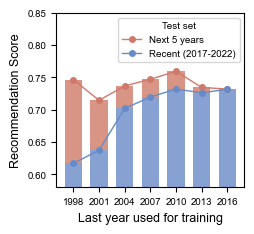

In [225]:
mm = 0.0393
plt.rcParams['font.family'] = 'arial'
plt.rcParams['font.size'] = 7

years = [1998, 2001, 2004, 2007, 2010, 2013, 2016]

#for year in [2017, 2018, 2019]:
#    plt.plot(years, summary_dict[year], color='#CCCCCC')

# plt.plot(years, summary_dict['total'], 'o-', color='red')

fig, ax = plt.subplots(1, 1, figsize=(65*mm, 60*mm))

plt.bar(x=years, height=summary_dict['near5'], width=2, color='#D89484')

plt.bar(x=years, height=summary_dict['2017'], width=2, color='#87A1D3')
plt.plot(years, summary_dict['near5'], '-o', color='#CF796A', markersize=4, linewidth=1)
plt.plot(years, summary_dict['2017'], '-o', color='#658CC8', markersize=4, linewidth=1)

#plt.xticks(range(len(years)), years)
plt.ylim(0.58, 0.85)

plt.xticks(years, years)
plt.ylabel('Recommendation Score', fontsize=9)
plt.xlabel('Last year used for training', fontsize=9)

plt.legend(['Next 5 years', 'Recent (2017-2022)'], loc='upper right', fontsize=7, title='Test set')
plt.tight_layout()

plt.savefig('year.eps', bbox_inches='tight')
plt.show()